# Lab2
At the end of class **upload two files** to Gradescope: 
* `Lab2.py` (which will be autograded)
* `Lab2.ipynb` (run all cells to make sure that outputs are visible)

**All Lab solutions will be graded** for correctness and completion. If you do not finish a Lab during class, upload your partial work. Then you will have a week to submit your completed solutions to Gradescope.

___

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Master Theorem

Given the recurrence $T(n) = aT(n/b) + f(n),$ let $k=\log_b(a)$.

  * If $f(n)$ is polynomially smaller than $n^k$, then $T(n)$ is $\Theta \left(n^k\right)$.
  * If $f(n)$ and $n^k$ are the same order, then $T(n)$ is $\Theta \left(n^k\log n\right)$.
  * If $f(n)$ is polynomially larger than $n^k$, then $T(n)$ is $\Theta(f(n))$.
  
**Apply the Master Theorem**<br>
Find tight asymptotic bounds for the following recurrences.
* $T_1(n) = 2T_1(n/3) + n$
* $T_2(n) = 8T_2(n/2) + n^2 + n$
* $T_3(n) = T_3(3n/4) + 5$
* $T_4(n) = 7T_4(n/3) + n^2$

Uncomment the variables in the next cell and assign a number to each variable, choosing from the following possible answers. Justification is not necessary.<br>
1. $T(n)$ is $\Theta(1)$.
2. $T(n)$ is $\Theta(\log n)$.
3. $T(n)$ is $\Theta(n)$.
4. $T(n)$ is $\Theta(n\log n)$.
5. $T(n)$ is $\Theta(n^2)$.
6. $T(n)$ is $\Theta(n^2\log n)$.
7. $T(n)$ is $\Theta(n^3)$.
8. $T(n)$ is $\Theta(n^3\log n)$.
9. None of these

For example, if $T_1(n)$ is $\Theta(n^3\log n)$, set `T_1_asymptotic_bound = 8`.

In [2]:
T_1_asymptotic_bound = 3
T_2_asymptotic_bound = 7
T_3_asymptotic_bound = 2
T_4_asymptotic_bound = 5

### Triangle Class
Create a **`Triangle`** class. Each `Triangle` object is defined by a list of vertex coordinates. Include the following method:

* **`draw(self, color='k')`** displays the colored triangle. The default color is black.

Example:<br>
`Triangle([(0, 0), (4, 0), (4, 3)]).draw('b')` displays the following:

<img src = "http://www.coloradomath.org/python/triangle_blue.jpg" width="372" height="248" />

In [11]:
class Triangle:
    
    def __init__(self, vert_lst):
        self.xvals, self.yvals = zip(*vert_lst)
        
    def draw(self, color='k'):
        plt.fill(self.xvals, self.yvals, c=color)
        plt.axis('equal')
#         plt.axis('off')

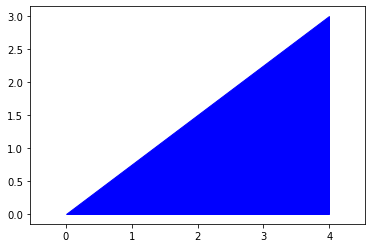

In [12]:
Triangle([(0, 0), (4, 0), (4, 3)]).draw('b')

### Equilateral Triangle Class

Create a **EquilTriangle** subclass that inherits all the properties of the `Triangle` class. Assume that each `EquilTriangle` object has a side parallel to the $x$-axis. It is defined by 
* the (x, y) location of its left vertex,
* its side length, and
* its orientation (either `'up'` (default) or `'down'`).

Example:<br>
`EquilTriangle((2, 1), 3, 'down').draw()` displays

<img src = "http://www.coloradomath.org/python/equiltriangle_black.jpg" width="381" height="248" />

In [13]:
class EquilTriangle(Triangle):
    def __init__(self, left_vert_loc, s, orient):
        start_x = left_vert_loc[0]
        start_y = left_vert_loc[1]
        xvals = [start_x, start_x+s, start_x+(s/2)]
        yvals = [start_y, start_y]
        if orient=='up':
            yvals += [start_y + (math.sqrt(3)/2)*s]
        else:
            yvals += [start_y - (math.sqrt(3)/2)*s]
        Triangle.__init__(self, list(zip(xvals,yvals)))

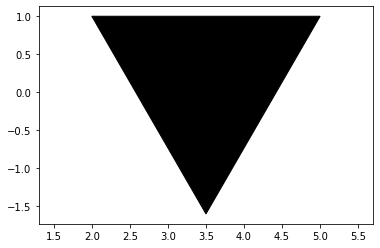

In [14]:
EquilTriangle((2, 1), 3, 'down').draw()

### Sierpinski Triangle
The *Sierpinski triangle*, also called the Sierpinski gasket or Sierpinski sieve, is a self-similar fractal formed by an equilateral triangle subdivided recursively into smaller equilateral triangles.

<img src = "http://www.coloradomath.org/python/sierpinskis.jpg" width="717" height="118" />

Write a function called **`sierpinski`** that draws an `n`-level Sierpinski triangle. It should **apply recursion** and use the `EquilTriangle` drawing method. Shown above are the results for the `n` values 0, 1, 2, 3, and 4.

In [15]:
def sierpinski(n, s, startx, starty):
    
    if n==0:
        return EquilTriangle((startx,starty), s, 'up').draw()
    
    sierpinski((n-1), s/2, startx, starty)
    sierpinski((n-1), s/2, startx+(s/4), starty+(s*math.sqrt(3)/4))
    sierpinski((n-1), s/2, startx+(s/2), starty)

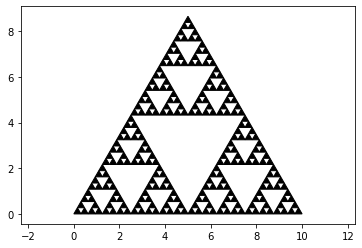

In [17]:
sierpinski(5, 10, 0, 0)

**Draw the Sierpinski triangle** for n=7.

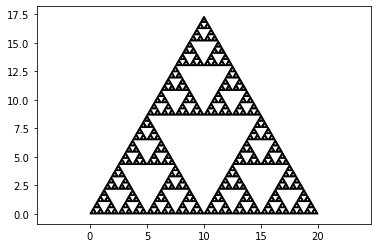

In [23]:
sierpinski(7, 20, 0, 0)